## DeepSat (SAT-6) Airborne Dataset Analysis
### Purpose is to characterize the DeepSat Data/images into categories accurately
+ First step will be to be able to feed the data into a simple CNN using Batch Normalization and check the performance

+ Simple CNN performance characterized
- With 50000 train-images and 4000 test-images
    - {'Accuracy': 0.877, 'Precision': 0.9708216, 'Recall': 0.9918933, 'loss': 0.3487776, 'global_step': 98}
- With 100000 train-images and 10000 test-images and nearly 2000 Steps
    - {'Accuracy': 0.887, 'Precision': 0.99013156, 'Recall': 0.9774775, 'loss': 0.25368488, 'global_step': 196}
- With 20000 Train-images with BN and without BN 
    - 

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
path_a = os.getcwd()+"\deepsat-sat6"
print(f"path of the project : {path_a}")

# Print the contents of the path
from glob import glob
trainfiles, testfiles = [],[]
to_scan = path_a+"\*.csv"

for f in glob(to_scan):
    print(f)
    if "train" in f: 
        trainfiles.append(f)
    elif "test" in f: 
        testfiles.append(f)

print(trainfiles, testfiles)
# xtrain.iloc[0:0]
# ytrain.iloc[0:0]
# x_train.iloc[0:0]
# y_train.iloc[0:0]
xtrain = pd.read_csv(tf.gfile.Open(trainfiles[0]), nrows=324000, header=None) 
ytrain = pd.read_csv(tf.gfile.Open(trainfiles[1]), nrows=324000, header=None)
x_train = xtrain.values.reshape((xtrain.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_train = ytrain.values.astype(np.float32)

path of the project : C:\Users\Paperspace\Image_Analysis\deepsat-sat6
C:\Users\Paperspace\Image_Analysis\deepsat-sat6\sat6annotations.csv
C:\Users\Paperspace\Image_Analysis\deepsat-sat6\X_test_sat6.csv
C:\Users\Paperspace\Image_Analysis\deepsat-sat6\X_train_sat6.csv
C:\Users\Paperspace\Image_Analysis\deepsat-sat6\y_test_sat6.csv
C:\Users\Paperspace\Image_Analysis\deepsat-sat6\y_train_sat6.csv
['C:\\Users\\Paperspace\\Image_Analysis\\deepsat-sat6\\X_train_sat6.csv', 'C:\\Users\\Paperspace\\Image_Analysis\\deepsat-sat6\\y_train_sat6.csv'] ['C:\\Users\\Paperspace\\Image_Analysis\\deepsat-sat6\\X_test_sat6.csv', 'C:\\Users\\Paperspace\\Image_Analysis\\deepsat-sat6\\y_test_sat6.csv']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

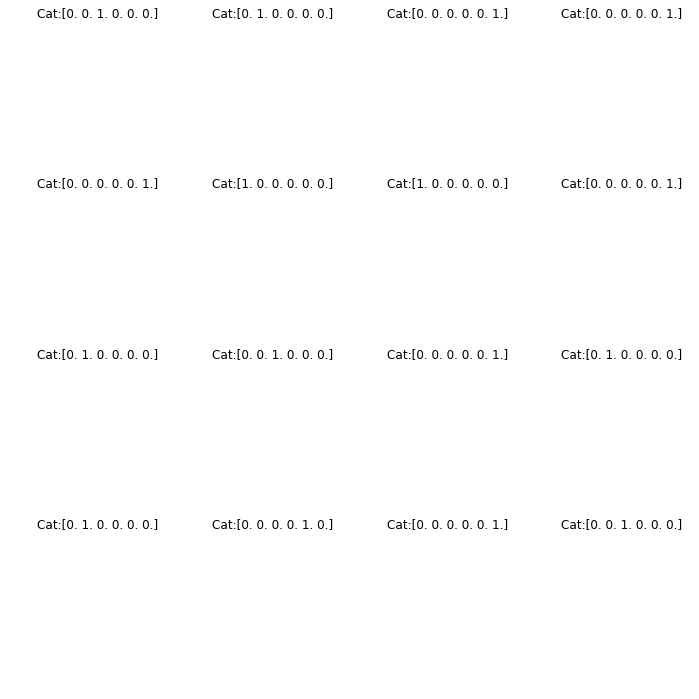

In [4]:
import matplotlib.pyplot as plt
c_train_x, c_train_y = x_train[0:16],y_train[0:16] 
fig, m_axs = plt.subplots(4, c_train_x.shape[0]//4, figsize = (12, 12))
for (x, y, c_ax) in zip(c_train_x, c_train_y, m_axs.flatten()):
    c_ax.imshow(x[:,:,:3],interpolation = 'none')
    c_ax.axis('off')
    c_ax.set_title('Cat:{}'.format(y))

In [5]:
xtest = pd.read_csv(tf.gfile.Open(testfiles[0]), nrows=81000, header=None) 
ytest = pd.read_csv(tf.gfile.Open(testfiles[1]), nrows=81000, header=None)
x_test = xtest.values.reshape((xtest.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_test = ytest.values.astype(np.float32)

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(324000, 28, 28, 4) (324000, 6) (81000, 28, 28, 4) (81000, 6)


In [10]:
'''
Without any Batch Normalization, checking the performance for the total Training set
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here
def cnn_model_fn(features, labels, mode, params, config):
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(pool2, [-1, int(pool2.shape[1]) * int(pool2.shape[2]) * int(pool2.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('loss', loss)
        tf.summary.scalar('F1Score', f1)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [13]:
'''
Printing out the losses per step
- Number of steps kept at 1
- Number of epochs kept at 3 each for train and test
- No Batch Norm used for the 1st set of results
'''
loss_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="C:/Users/Paperspace/Image_Analysis/cnn_model/1",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
from tqdm import tqdm
store_dict=defaultdict(dict)
for i in tqdm(range(10)):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=600, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {'_model_dir': 'C:/Users/Paperspace/Image_Analysis/cnn_model/1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AA3E9CB6A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}



  0%|                                                                                                                                                       | 0/10 [00:00<?, ?it/s]

This is the 0 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 4.658491, probabilities = [[0.03628146 0.00524792 0.9275069  0.01569822 0.00102851 0.01423702]
 [0.00743121 0.00348581 0.2923017  0.0000764  0.0000326  0.69667226]
 [0.00028684 0.00925582 0.8100243  0.00519342 0.00005873 0.17518082]
 ...
 [0.00031184 0.00083351 0.99759823 0.00005089 0.00004565 0.00115983]
 [0.00051242 0.00107078 0.5281816  0.00134642 0.00001879 0.46887   ]
 [0.00115196 0.04453951 0.7792054  0.00012265 0.00145364 0.1735269 ]]
INFO:tensorflow:loss = 4.658491, step = 1
INFO:tensorfl

INFO:tensorflow:loss = 0.40640956, probabilities = [[0.00618608 0.0000823  0.00029485 0.00012386 0.00034199 0.9929709 ]
 [0.01043331 0.41725004 0.06428526 0.501396   0.00230612 0.00432928]
 [0.00327474 0.977289   0.00426263 0.01226342 0.00106609 0.00184407]
 ...
 [0.00027211 0.2686753  0.00686228 0.72323304 0.00081397 0.00014329]
 [0.00201138 0.00008208 0.00093728 0.00006588 0.06256785 0.9343355 ]
 [0.00521696 0.09934792 0.31313097 0.5603973  0.02072189 0.00118501]] (9.761 sec)
INFO:tensorflow:loss = 0.38809067, probabilities = [[0.00206904 0.00029391 0.00489017 0.00017082 0.00260682 0.9899692 ]
 [0.00055285 0.9609428  0.0045232  0.02655962 0.00726568 0.00015578]
 [0.0165772  0.6983255  0.01664338 0.26304427 0.00528874 0.00012086]
 ...
 [0.00364271 0.51641154 0.06130743 0.41660637 0.00169013 0.00034185]
 [0.00520692 0.00002484 0.00336142 0.00004632 0.00136266 0.9899978 ]
 [0.00125039 0.95672053 0.00191694 0.0379879  0.0017795  0.00034467]] (9.900 sec)
INFO:tensorflow:loss = 0.5308335, 

INFO:tensorflow:loss = 1.0325296, probabilities = [[0.00179312 0.7785038  0.00456887 0.19579731 0.01926592 0.00007096]
 [0.08156405 0.00521207 0.00017437 0.00091266 0.05943249 0.85270435]
 [0.00222593 0.93834066 0.00284492 0.04604596 0.010362   0.00018058]
 ...
 [0.01492527 0.6192553  0.04212006 0.30426034 0.01752497 0.00191408]
 [0.00227029 0.48282498 0.08904421 0.42544046 0.00039766 0.00002241]
 [0.07969505 0.0058785  0.0006041  0.00173437 0.11386272 0.7982252 ]] (9.834 sec)
INFO:tensorflow:loss = 0.36699703, probabilities = [[0.01150814 0.00363292 0.7641422  0.21796404 0.00262812 0.00012455]
 [0.00130859 0.8513135  0.00291831 0.14334014 0.00092043 0.00019912]
 [0.00001322 0.00000065 0.00000304 0.00000602 0.00023243 0.9997446 ]
 ...
 [0.00000237 0.00000003 0.00000273 0.0000003  0.00000811 0.9999864 ]
 [0.01975869 0.00002636 0.0001411  0.00000976 0.00252404 0.97754   ]
 [0.00103995 0.7072609  0.14052564 0.15027484 0.00073365 0.00016491]] (9.802 sec)
INFO:tensorflow:loss = 0.42371175, 

INFO:tensorflow:global_step/sec: 1.02177
INFO:tensorflow:loss = 0.24317561, probabilities = [[0.00019769 0.05770187 0.01523379 0.9258991  0.00081626 0.00015128]
 [0.00113623 0.09624875 0.15066504 0.7501241  0.00178123 0.00004461]
 [0.00203688 0.00000183 0.00018288 0.00001372 0.00125938 0.9965054 ]
 ...
 [0.00003662 0.00000389 0.00014156 0.00000614 0.00001162 0.99980015]
 [0.03359053 0.5794118  0.20956607 0.1744302  0.00234569 0.00065576]
 [0.00033142 0.62673545 0.0044596  0.3676441  0.00043779 0.00039165]] (9.752 sec)
INFO:tensorflow:loss = 0.24317561, step = 501 (97.872 sec)
INFO:tensorflow:loss = 0.29569227, probabilities = [[0.00551591 0.95659953 0.00329293 0.03149806 0.00295735 0.00013619]
 [0.00623807 0.0000213  0.00002314 0.00014723 0.00263998 0.99093026]
 [0.00001363 0.00000087 0.00004854 0.00000224 0.00095759 0.9989772 ]
 ...
 [0.00108718 0.00025537 0.9942589  0.00423511 0.00014291 0.00002052]
 [0.00141319 0.00002453 0.00029309 0.0000263  0.00435113 0.9938917 ]
 [0.30655152 0.6


 10%|██████████████                                                                                                                              | 1/10 [13:07<1:58:03, 787.07s/it]

This is the 1 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 600 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.31471944, probabilities = [[0.00049269 0.00000759 0.0001572  0.00000551 0.00120138 0.99813557]
 [0.00000226 0.00000106 0.00001202 0.00000371 0.00002569 0.9999553 ]
 [0.00073824 0.98465526 0.00860908 0.00419101 0.00172703 0.00007938]
 ...
 [0.00067302 0.00016747 0.00043598 0.00020799 0.00041891 0.99809664]
 [0.00038498 0.00728097 0.90703255 0.08432245 0.00091873 0.00006033]
 [0.00007169 0.00

INFO:tensorflow:loss = 0.48913413, probabilities = [[0.01965901 0.07217005 0.18988818 0.6918239  0.02589976 0.00055916]
 [0.01053657 0.10551451 0.05258694 0.83068895 0.00041253 0.00026042]
 [0.00011752 0.01662275 0.02483817 0.9581467  0.00023411 0.00004071]
 ...
 [0.00028746 0.00005329 0.00005269 0.00009012 0.00035483 0.9991616 ]
 [0.00000344 0.00038654 0.0115807  0.9879252  0.00004798 0.00005623]
 [0.00623817 0.88362944 0.00352738 0.09517445 0.00977194 0.00165866]] (9.813 sec)
INFO:tensorflow:loss = 0.19424297, probabilities = [[0.00368212 0.6234967  0.0121185  0.3600979  0.00051236 0.00009241]
 [0.00086484 0.01519942 0.05134077 0.9316046  0.00050955 0.00048077]
 [0.00008055 0.00000203 0.00000978 0.00000371 0.00006503 0.9998388 ]
 ...
 [0.00036235 0.00000312 0.00005424 0.00001472 0.0029108  0.99665475]
 [0.00130414 0.00040751 0.00031595 0.0007148  0.01665749 0.98060006]
 [0.00134355 0.00756171 0.34897792 0.6413961  0.00061193 0.0001088 ]] (9.671 sec)
INFO:tensorflow:loss = 0.25621346,

INFO:tensorflow:loss = 0.18410823, probabilities = [[0.05776494 0.2541064  0.28415218 0.39481792 0.00764086 0.00151763]
 [0.00236855 0.2276772  0.0357595  0.73355764 0.00016675 0.0004704 ]
 [0.00006966 0.00000372 0.00011812 0.00001506 0.0001156  0.9996779 ]
 ...
 [0.00103154 0.9564276  0.00062703 0.04118211 0.00059641 0.00013539]
 [0.00057986 0.00001012 0.00000716 0.00002552 0.00088665 0.9984907 ]
 [0.00111697 0.00000298 0.00180175 0.00000858 0.00956338 0.9875064 ]] (9.574 sec)
INFO:tensorflow:loss = 0.23574461, probabilities = [[0.01125819 0.52814746 0.10097566 0.35142237 0.00363488 0.00456133]
 [0.00022926 0.00000176 0.00005519 0.0000024  0.00015885 0.99955255]
 [0.00028384 0.00189641 0.986603   0.01073014 0.0003847  0.00010189]
 ...
 [0.00107513 0.9818918  0.00121098 0.01479956 0.00060087 0.00042169]
 [0.00006931 0.99440116 0.00009472 0.00541413 0.00001352 0.00000712]
 [0.00032574 0.00000012 0.00017689 0.0000018  0.00049001 0.9990055 ]] (9.708 sec)
INFO:tensorflow:loss = 0.247766, p

INFO:tensorflow:global_step/sec: 1.02296
INFO:tensorflow:loss = 0.18877906, probabilities = [[0.00012391 0.00010262 0.995893   0.00360775 0.00023329 0.00003944]
 [0.00248848 0.9312561  0.00479542 0.06090466 0.00049245 0.00006288]
 [0.02227521 0.00002221 0.00019428 0.00001799 0.00995645 0.9675339 ]
 ...
 [0.0003937  0.00000748 0.00004604 0.00001741 0.00117738 0.99835795]
 [0.00133129 0.9261871  0.00044749 0.07174493 0.00026245 0.00002668]
 [0.00001694 0.         0.00001109 0.00000008 0.00000954 0.99996233]] (9.653 sec)
INFO:tensorflow:loss = 0.18877906, step = 1101 (97.754 sec)
INFO:tensorflow:loss = 0.30714667, probabilities = [[0.00329066 0.09086007 0.03450965 0.86844456 0.0026845  0.00021062]
 [0.0041921  0.7997459  0.00153814 0.19379677 0.00058236 0.00014473]
 [0.00050048 0.02916876 0.01295638 0.95536673 0.00187747 0.00013018]
 ...
 [0.00082858 0.00763105 0.1959842  0.7951424  0.00014516 0.00026859]
 [0.00337111 0.21897402 0.19544014 0.57677656 0.003953   0.00148523]
 [0.00004415 0.


 20%|████████████████████████████                                                                                                                | 2/10 [26:09<1:44:45, 785.68s/it]

This is the 2 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1200 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.16546893, probabilities = [[0.00088508 0.81028247 0.00596121 0.18120362 0.0015125  0.00015508]
 [0.65801585 0.0020902  0.00515454 0.00907067 0.26805496 0.05761371]
 [0.00007975 0.00000529 0.9969813  0.00291809 0.00000863 0.00000682]
 ...
 [0.00001638 0.00000005 0.00000929 0.00000206 0.00006677 0.99990547]
 [0.00186573 0.9668258  0.00064709 0.02785547 0.00192796 0.00087803]
 [0.4021261  0.

INFO:tensorflow:loss = 0.16170791, probabilities = [[0.00000549 0.00000076 0.00029402 0.00000059 0.00000198 0.9996972 ]
 [0.00016859 0.00012502 0.9993874  0.00017655 0.00012406 0.0000184 ]
 [0.70235246 0.00050537 0.00051489 0.00080686 0.29408535 0.00173496]
 ...
 [0.00044751 0.8860069  0.01692214 0.08574653 0.01045574 0.00042106]
 [0.00241147 0.0000006  0.00011588 0.00003479 0.00055499 0.9968823 ]
 [0.02698667 0.00006086 0.00042424 0.00012257 0.00069088 0.9717148 ]] (9.823 sec)
INFO:tensorflow:loss = 0.16111054, probabilities = [[0.00079619 0.8674135  0.00973272 0.11958549 0.00240181 0.0000702 ]
 [0.00112779 0.00000181 0.00003609 0.00000614 0.00021469 0.9986135 ]
 [0.00328302 0.46373734 0.01059637 0.52192557 0.00041139 0.00004631]
 ...
 [0.00603972 0.1076007  0.36788523 0.49856147 0.01347002 0.00644281]
 [0.00232576 0.22907282 0.02244689 0.7455085  0.00024837 0.00039757]
 [0.00004662 0.00046283 0.21577676 0.78291863 0.00018335 0.00061185]] (9.669 sec)
INFO:tensorflow:loss = 0.1599656, 

INFO:tensorflow:loss = 0.12292731, probabilities = [[0.00283777 0.00287964 0.9575244  0.03605456 0.00065564 0.00004794]
 [0.0000381  0.01086296 0.81735384 0.17090487 0.00076315 0.00007711]
 [0.00041861 0.00000538 0.00013031 0.00032336 0.00064119 0.9984812 ]
 ...
 [0.00902568 0.9730387  0.0003744  0.01612117 0.00139541 0.00004461]
 [0.00054743 0.9736821  0.00015419 0.02306693 0.00251127 0.00003815]
 [0.00023557 0.00000028 0.00006631 0.00000719 0.00015697 0.99953365]] (9.610 sec)
INFO:tensorflow:loss = 0.1474978, probabilities = [[0.00012834 0.8995834  0.00074714 0.09923393 0.00018459 0.00012259]
 [0.00006278 0.00000235 0.00658116 0.00000324 0.00063152 0.99271894]
 [0.00305501 0.05706394 0.01816838 0.92018795 0.00095522 0.00056956]
 ...
 [0.00007678 0.9736596  0.00002161 0.0262086  0.00001122 0.00002222]
 [0.00001992 0.         0.00001512 0.00000011 0.00000346 0.9999614 ]
 [0.0002588  0.9717045  0.00036172 0.0269728  0.00066081 0.00004136]] (9.763 sec)
INFO:tensorflow:loss = 0.16577663, 

INFO:tensorflow:global_step/sec: 1.02984
INFO:tensorflow:loss = 0.13315693, probabilities = [[0.00005573 0.9932575  0.00001392 0.00664201 0.00002397 0.00000685]
 [0.00103984 0.21271136 0.01009971 0.77287614 0.00266669 0.00060624]
 [0.00027362 0.00001577 0.00260678 0.00034464 0.00071064 0.9960485 ]
 ...
 [0.00224647 0.71862763 0.00659282 0.2699544  0.00214587 0.00043282]
 [0.00016008 0.00000257 0.00002899 0.00001104 0.00008915 0.9997081 ]
 [0.00003608 0.00000009 0.00004565 0.00000024 0.00000876 0.99990916]] (9.687 sec)
INFO:tensorflow:loss = 0.13315693, step = 1701 (97.101 sec)
INFO:tensorflow:loss = 0.13327363, probabilities = [[0.00018426 0.00014305 0.9938559  0.00568708 0.00009884 0.00003081]
 [0.00049378 0.00050975 0.99056727 0.00762113 0.0007169  0.00009124]
 [0.00023    0.99444467 0.0000374  0.00506321 0.00018685 0.00003792]
 ...
 [0.00256467 0.9402984  0.00049396 0.05423887 0.00230122 0.00010276]
 [0.00048911 0.9757446  0.00009624 0.02353819 0.00011474 0.00001726]
 [0.00001349 0.


 30%|██████████████████████████████████████████                                                                                                  | 3/10 [39:12<1:31:33, 784.81s/it]

This is the 3 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-1800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1800 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.44189203, probabilities = [[0.00015065 0.05090578 0.00310518 0.94517493 0.00050184 0.00016163]
 [0.0006032  0.9570775  0.00158605 0.03993886 0.00077127 0.00002316]
 [0.0002386  0.00286381 0.49499503 0.50155973 0.00023385 0.00010893]
 ...
 [0.00009706 0.0000005  0.00002078 0.00000308 0.00012009 0.99975854]
 [0.0000893  0.00513807 0.01984576 0.97408694 0.00046039 0.00037952]
 [0.00001156 0.

INFO:tensorflow:loss = 0.15589872, probabilities = [[0.00003784 0.00000398 0.00011243 0.00003444 0.00019355 0.9996177 ]
 [0.0000037  0.00000033 0.00000957 0.00000969 0.00001507 0.9999616 ]
 [0.00000032 0.00000002 0.00000857 0.00000002 0.00000025 0.9999908 ]
 ...
 [0.03237625 0.03086758 0.79460466 0.13826269 0.00248074 0.00140817]
 [0.00000585 0.00000017 0.00000131 0.0000007  0.00008897 0.99990296]
 [0.00018251 0.00000082 0.0000265  0.00001179 0.00005254 0.99972576]] (9.866 sec)
INFO:tensorflow:loss = 0.18067692, probabilities = [[0.00068344 0.00010344 0.9936604  0.00530327 0.00011048 0.0001389 ]
 [0.00002278 0.00000007 0.00000206 0.00000054 0.00000808 0.9999665 ]
 [0.00141947 0.05307043 0.00712334 0.937368   0.00032903 0.00068972]
 ...
 [0.0000635  0.00000454 0.0002547  0.00005468 0.00041134 0.9992112 ]
 [0.00186415 0.00004403 0.00082957 0.00010759 0.00083341 0.9963213 ]
 [0.00009601 0.00000008 0.00010539 0.00000081 0.00003322 0.9997645 ]] (9.544 sec)
INFO:tensorflow:loss = 0.13956544,

INFO:tensorflow:loss = 0.13645193, probabilities = [[0.7546849  0.00119189 0.00015205 0.00351887 0.23902121 0.00143104]
 [0.00001205 0.00000027 0.00010793 0.00000303 0.00001722 0.99985945]
 [0.00010541 0.99639386 0.00001715 0.0033476  0.00013217 0.00000389]
 ...
 [0.00004234 0.00000001 0.0000422  0.00000004 0.00000144 0.99991393]
 [0.0012162  0.00040539 0.99240476 0.00490722 0.00095798 0.0001084 ]
 [0.00002934 0.00000003 0.00000576 0.00000072 0.00006108 0.9999031 ]] (9.626 sec)
INFO:tensorflow:loss = 0.13363892, probabilities = [[0.00001579 0.00000012 0.00001852 0.00000308 0.00006435 0.9998981 ]
 [0.00183295 0.74999565 0.01424597 0.21673827 0.01651445 0.00067284]
 [0.00004369 0.00000035 0.00015376 0.00000691 0.00001048 0.9997849 ]
 ...
 [0.7141031  0.00085392 0.00029566 0.00086518 0.27939603 0.00448616]
 [0.00053286 0.9302119  0.00030683 0.06869578 0.00021678 0.00003596]
 [0.00001868 0.00162481 0.00170989 0.99641377 0.00017046 0.00006252]] (9.746 sec)
INFO:tensorflow:loss = 0.13629213,

INFO:tensorflow:global_step/sec: 1.02068
INFO:tensorflow:loss = 0.17163895, probabilities = [[0.00003234 0.00000008 0.00002779 0.00000019 0.00001267 0.9999269 ]
 [0.00009029 0.00016848 0.99738127 0.00231247 0.00001046 0.00003712]
 [0.0091133  0.4998817  0.08441015 0.39389548 0.01254    0.00015929]
 ...
 [0.0000758  0.00000023 0.0000556  0.00000673 0.00030631 0.9995553 ]
 [0.00062087 0.04237343 0.00882748 0.94701505 0.00102551 0.00013757]
 [0.00000487 0.00002016 0.9979944  0.00197185 0.00000585 0.00000297]] (9.991 sec)
INFO:tensorflow:loss = 0.17163895, step = 2301 (97.973 sec)
INFO:tensorflow:loss = 0.12708598, probabilities = [[0.0000371  0.00000063 0.0000126  0.00000382 0.00003576 0.9999101 ]
 [0.00370637 0.00003847 0.00018109 0.00002246 0.00028195 0.99576974]
 [0.00115635 0.00023356 0.9977762  0.00071862 0.00007602 0.00003928]
 ...
 [0.00198823 0.00001001 0.00004827 0.00003915 0.00046414 0.9974502 ]
 [0.00044903 0.11279903 0.00458206 0.88085717 0.00124289 0.0000698 ]
 [0.00021267 0.


 40%|████████████████████████████████████████████████████████                                                                                    | 4/10 [52:17<1:18:29, 784.86s/it]

This is the 4 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-2400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2400 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.16468054, probabilities = [[0.00008182 0.00000054 0.00018433 0.00002274 0.00010637 0.9996043 ]
 [0.6821505  0.0068286  0.00233576 0.0587818  0.24776322 0.00214022]
 [0.00008653 0.01358201 0.00247186 0.983528   0.00022521 0.0001064 ]
 ...
 [0.00014616 0.00000095 0.0001634  0.00001277 0.00003236 0.9996444 ]
 [0.00010125 0.00003959 0.9973036  0.00224996 0.000173   0.00013257]
 [0.00006234 0.

INFO:tensorflow:loss = 0.12461666, probabilities = [[0.00088884 0.86367905 0.00012912 0.13478772 0.00049644 0.00001888]
 [0.00004656 0.00000075 0.9988194  0.00108495 0.0000405  0.00000791]
 [0.00010164 0.000003   0.00000273 0.00001766 0.00052557 0.9993494 ]
 ...
 [0.0001059  0.98072916 0.00008373 0.01904363 0.00002141 0.00001608]
 [0.00029866 0.00000013 0.00004941 0.00000144 0.00024915 0.9994012 ]
 [0.00075035 0.00163679 0.23985586 0.7561286  0.00097541 0.00065306]] (9.623 sec)
INFO:tensorflow:loss = 0.15606138, probabilities = [[0.00014133 0.01075543 0.00717013 0.98140126 0.00041639 0.0001155 ]
 [0.00006274 0.         0.00053275 0.00000143 0.00017312 0.9992299 ]
 [0.0000495  0.04103862 0.0009244  0.9577845  0.00010675 0.00009627]
 ...
 [0.00001223 0.00000005 0.00002055 0.00000748 0.00002254 0.9999372 ]
 [0.00006501 0.00000003 0.00003259 0.00000026 0.00000855 0.99989355]
 [0.000302   0.9100308  0.00160739 0.08754694 0.00049455 0.00001837]] (9.625 sec)
INFO:tensorflow:loss = 0.12545472,

INFO:tensorflow:loss = 0.15128472, probabilities = [[0.00092807 0.9645037  0.00173707 0.03046812 0.00222822 0.00013478]
 [0.0001062  0.98554915 0.0004822  0.01346823 0.00029005 0.00010427]
 [0.00004837 0.35229355 0.0013093  0.6461284  0.00015474 0.00006561]
 ...
 [0.00018872 0.7710457  0.00084382 0.22719865 0.00061743 0.00010569]
 [0.00001329 0.9900545  0.00001209 0.00989691 0.00002099 0.00000219]
 [0.00001922 0.00000013 0.00000072 0.00000327 0.00002737 0.99994934]] (9.658 sec)
INFO:tensorflow:loss = 0.14493424, probabilities = [[0.00020387 0.02075036 0.00493211 0.9731591  0.00052106 0.00043336]
 [0.00125989 0.00000002 0.00018134 0.0001377  0.00086341 0.99755764]
 [0.00010983 0.00000007 0.00007215 0.00000013 0.00004108 0.9997768 ]
 ...
 [0.00014437 0.9334235  0.00024116 0.0659995  0.00018334 0.00000812]
 [0.00032868 0.00086667 0.9415204  0.05559063 0.0006695  0.00102422]
 [0.00003281 0.00000002 0.00005785 0.00000143 0.00000437 0.99990356]] (9.905 sec)
INFO:tensorflow:loss = 0.15398274,

INFO:tensorflow:global_step/sec: 1.02658
INFO:tensorflow:loss = 0.20600536, probabilities = [[0.00059695 0.00014008 0.99523664 0.00376381 0.00013394 0.00012856]
 [0.00138244 0.5638612  0.0049292  0.41936797 0.01027808 0.00018106]
 [0.00013021 0.00000036 0.00001844 0.00000485 0.00002277 0.9998234 ]
 ...
 [0.00057977 0.9943773  0.00011509 0.00469486 0.00016782 0.00006511]
 [0.00025264 0.00047426 0.9946833  0.00434809 0.00015161 0.00009014]
 [0.00126153 0.00318628 0.9334473  0.0599272  0.00148663 0.00069102]] (9.600 sec)
INFO:tensorflow:loss = 0.20600536, step = 2901 (97.409 sec)
INFO:tensorflow:loss = 0.10745789, probabilities = [[0.0001268  0.96450084 0.00005058 0.03527891 0.00002196 0.00002098]
 [0.00057849 0.00204646 0.98707414 0.00912227 0.00108151 0.00009721]
 [0.00013897 0.03773742 0.00419981 0.95640343 0.00149555 0.0000249 ]
 ...
 [0.00023443 0.9552679  0.00022287 0.04282327 0.00144822 0.00000336]
 [0.00046827 0.00000287 0.00000659 0.0000087  0.00061401 0.9988996 ]
 [0.9362165  0.


 50%|█████████████████████████████████████████████████████████████████████                                                                     | 5/10 [1:05:21<1:05:23, 784.66s/it]

This is the 5 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3000 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.123372786, probabilities = [[0.00008562 0.98767775 0.00005616 0.01200968 0.00012895 0.00004188]
 [0.0001084  0.00001092 0.9996457  0.00021723 0.00001013 0.00000768]
 [0.00000137 0.00000001 0.00000865 0.00000001 0.00000208 0.99998784]
 ...
 [0.00021741 0.00000558 0.999366   0.00034097 0.00006465 0.00000535]
 [0.00024716 0.9865993  0.0000338  0.01302731 0.00006627 0.00002623]
 [0.00038603 0

INFO:tensorflow:loss = 0.12405606, probabilities = [[0.00094412 0.0000003  0.00000182 0.00000936 0.00182892 0.9972155 ]
 [0.00069645 0.80944    0.00032989 0.18739517 0.0019899  0.00014856]
 [0.00000171 0.00000001 0.00000018 0.00000025 0.00000141 0.9999964 ]
 ...
 [0.00051223 0.93854666 0.00020674 0.06029636 0.00031674 0.00012133]
 [0.83550423 0.00081493 0.00011629 0.0007542  0.16268292 0.00012741]
 [0.16903692 0.00271355 0.00044986 0.00351534 0.8239092  0.00037508]] (9.800 sec)
INFO:tensorflow:loss = 0.14975277, probabilities = [[0.00000691 0.9725801  0.00000879 0.02737129 0.00002781 0.00000507]
 [0.00016847 0.93793976 0.00008    0.06132729 0.00048082 0.00000364]
 [0.00507536 0.00193549 0.98426276 0.00688018 0.0014777  0.00036842]
 ...
 [0.00571197 0.00000572 0.00010737 0.00010514 0.01256135 0.98150843]
 [0.39114207 0.00021827 0.00056884 0.0020593  0.6049689  0.00104264]
 [0.35698703 0.001271   0.0005429  0.00565624 0.6345398  0.00100312]] (9.672 sec)
INFO:tensorflow:loss = 0.13958675,

INFO:tensorflow:loss = 0.16110726, probabilities = [[0.00137154 0.0000001  0.00042992 0.00000054 0.00464431 0.99355364]
 [0.00012544 0.9838335  0.00013698 0.01526023 0.00063772 0.00000611]
 [0.0005298  0.00004406 0.9982406  0.00054316 0.00055236 0.00009003]
 ...
 [0.0000064  0.97012746 0.00002943 0.02981488 0.00001747 0.00000437]
 [0.0000539  0.05892126 0.00150967 0.93839264 0.00108483 0.00003767]
 [0.00003669 0.00000013 0.00000086 0.00000023 0.00002352 0.9999386 ]] (9.623 sec)
INFO:tensorflow:loss = 0.13283622, probabilities = [[0.00045669 0.00000006 0.00000901 0.0000007  0.0000853  0.99944824]
 [0.00003784 0.00000027 0.0000129  0.00000024 0.00020871 0.99974006]
 [0.96350557 0.00036768 0.0002054  0.00295167 0.0319443  0.00102551]
 ...
 [0.00001179 0.00174424 0.96523774 0.03295929 0.00002821 0.0000188 ]
 [0.00000142 0.00000003 0.00000026 0.00000031 0.0004963  0.9995017 ]
 [0.0011103  0.00000321 0.00190593 0.00001339 0.00003344 0.9969337 ]] (9.755 sec)
INFO:tensorflow:loss = 0.1252003, 

INFO:tensorflow:global_step/sec: 1.03418
INFO:tensorflow:loss = 0.26659137, probabilities = [[0.00003413 0.93211067 0.00002637 0.06757882 0.00024494 0.00000525]
 [0.00058528 0.00356763 0.9589899  0.03628467 0.00035237 0.00022014]
 [0.00015402 0.00000019 0.0005078  0.00001113 0.00002903 0.99929786]
 ...
 [0.0000032  0.00000002 0.00000616 0.00000027 0.00005717 0.9999331 ]
 [0.0000051  0.01701977 0.00096235 0.98198515 0.00002558 0.00000198]
 [0.00000659 0.008393   0.00105941 0.99049324 0.00004272 0.00000508]] (9.616 sec)
INFO:tensorflow:loss = 0.26659137, step = 3501 (96.694 sec)
INFO:tensorflow:loss = 0.10854006, probabilities = [[0.00005033 0.01171197 0.00687726 0.9811416  0.00014768 0.0000711 ]
 [0.7789537  0.00044279 0.0023901  0.00171808 0.21532007 0.0011754 ]
 [0.0000083  0.00194946 0.16422568 0.83364576 0.00015432 0.00001653]
 ...
 [0.00117406 0.00000025 0.0000016  0.00003299 0.00013702 0.998654  ]
 [0.8737813  0.00019997 0.00056022 0.00124601 0.12399158 0.00022092]
 [0.8891787  0.


 60%|████████████████████████████████████████████████████████████████████████████████████                                                        | 6/10 [1:18:20<52:11, 782.99s/it]

This is the 6 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3600 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.1444564, probabilities = [[0.00014642 0.98707694 0.00008688 0.01226573 0.00039475 0.00002925]
 [0.00000523 0.998359   0.00000567 0.00159597 0.00002416 0.0000099 ]
 [0.00009474 0.00000002 0.00002769 0.00000032 0.00000467 0.99987257]
 ...
 [0.00001254 0.98796403 0.00000563 0.01191644 0.00009806 0.00000326]
 [0.00000383 0.00000002 0.00000029 0.00000022 0.00011094 0.9998847 ]
 [0.00001105 0.0

INFO:tensorflow:loss = 0.12021655, probabilities = [[0.00011428 0.00400894 0.00758698 0.987844   0.00042507 0.0000207 ]
 [0.00348402 0.00003081 0.00008899 0.00004058 0.005475   0.9908806 ]
 [0.00004608 0.7554487  0.00022327 0.2439944  0.00026156 0.00002603]
 ...
 [0.00062253 0.49676582 0.00118506 0.4955708  0.00582563 0.00003015]
 [0.01697298 0.00074422 0.97717154 0.0045601  0.00041172 0.00013944]
 [0.00000291 0.00000006 0.00002119 0.00005003 0.00000353 0.9999223 ]] (9.528 sec)
INFO:tensorflow:loss = 0.14609443, probabilities = [[0.00012309 0.97229856 0.00009935 0.02627439 0.0010993  0.0001054 ]
 [0.6695563  0.00559446 0.0002691  0.00742641 0.3132617  0.00389196]
 [0.13133405 0.00174699 0.00030485 0.0058749  0.8580539  0.00268523]
 ...
 [0.00007196 0.9877238  0.00001112 0.01208003 0.0001119  0.00000127]
 [0.00029417 0.9837226  0.00004649 0.0150142  0.00087961 0.00004301]
 [0.00000464 0.00001198 0.9917321  0.00810198 0.00006531 0.00008391]] (9.677 sec)
INFO:tensorflow:loss = 0.1439459, 

INFO:tensorflow:loss = 0.13730286, probabilities = [[0.00035578 0.00000084 0.0000033  0.00000099 0.00006717 0.99957186]
 [0.00002276 0.00119653 0.00194239 0.99676126 0.00005067 0.00002654]
 [0.0003727  0.00000046 0.00007212 0.00000921 0.00057486 0.9989706 ]
 ...
 [0.00015045 0.8863885  0.00015003 0.11247648 0.00080632 0.00002811]
 [0.0002855  0.00001054 0.00000193 0.0000664  0.00054688 0.99908876]
 [0.00029541 0.00057857 0.9876417  0.01106294 0.00040135 0.00001998]] (9.559 sec)
INFO:tensorflow:loss = 0.09120177, probabilities = [[0.00026443 0.00001773 0.99909234 0.00060074 0.00001281 0.00001193]
 [0.00002462 0.02355951 0.00072364 0.9755553  0.0001116  0.00002519]
 [0.00002143 0.01374706 0.00017081 0.98584795 0.00020644 0.00000623]
 ...
 [0.00115078 0.00022289 0.9927089  0.00583287 0.00007083 0.0000136 ]
 [0.00264052 0.00082635 0.41111812 0.5850055  0.00036377 0.00004572]
 [0.00009282 0.0033936  0.04829866 0.9477789  0.00038671 0.0000493 ]] (9.389 sec)
INFO:tensorflow:loss = 0.11580141,

INFO:tensorflow:global_step/sec: 1.0405
INFO:tensorflow:loss = 0.122071415, probabilities = [[0.00093233 0.00002661 0.9986904  0.00023519 0.00002325 0.00009215]
 [0.0000573  0.00000019 0.00012956 0.00000213 0.00004212 0.9997687 ]
 [0.00001907 0.9923537  0.00000549 0.00751246 0.00009869 0.00001061]
 ...
 [0.00001438 0.00000001 0.00002042 0.0000008  0.00016867 0.99979573]
 [0.00020467 0.21204351 0.00149125 0.7789037  0.00732877 0.00002806]
 [0.00005225 0.98042023 0.00001228 0.01940599 0.00009277 0.00001648]] (9.654 sec)
INFO:tensorflow:loss = 0.122071415, step = 4101 (96.104 sec)
INFO:tensorflow:loss = 0.0935985, probabilities = [[0.00003003 0.00007019 0.99067956 0.00918553 0.00001564 0.00001903]
 [0.00006449 0.00007867 0.9967007  0.00305176 0.00008119 0.00002319]
 [0.00072894 0.00001289 0.99849594 0.00062719 0.00010596 0.00002917]
 ...
 [0.00026556 0.73193145 0.00030884 0.26659656 0.00079409 0.00010337]
 [0.00012224 0.99195415 0.00000783 0.00784625 0.0000663  0.00000321]
 [0.00159439 0.


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████                                          | 7/10 [1:31:14<39:00, 780.14s/it]

This is the 7 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-4200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4200 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.09283615, probabilities = [[0.00137994 0.00000187 0.00001723 0.00002271 0.00127371 0.99730456]
 [0.00074889 0.00205024 0.93137264 0.06511812 0.00048731 0.00022279]
 [0.00018249 0.00000083 0.00002049 0.00019661 0.00011853 0.999481  ]
 ...
 [0.00029226 0.0002359  0.9703705  0.02823909 0.00071567 0.00014653]
 [0.000033   0.00000018 0.00035348 0.00000029 0.00010786 0.99950516]
 [0.00004847 0.

INFO:tensorflow:loss = 0.13701835, probabilities = [[0.8564761  0.00037069 0.00035761 0.00038768 0.14214107 0.00026679]
 [0.00002264 0.00000001 0.00001393 0.00001101 0.00010488 0.99984753]
 [0.9213396  0.00038779 0.00006521 0.00061221 0.07678212 0.00081312]
 ...
 [0.00007466 0.00002126 0.9995123  0.00034672 0.00000912 0.00003587]
 [0.0000997  0.00000003 0.00000297 0.00000042 0.0000166  0.9998803 ]
 [0.00000932 0.00002289 0.00000592 0.00019084 0.02257665 0.97719437]] (9.432 sec)
INFO:tensorflow:loss = 0.10485755, probabilities = [[0.00001438 0.979677   0.00001136 0.02023889 0.00005665 0.00000172]
 [0.00000575 0.0000011  0.00008283 0.00000705 0.00006504 0.99983823]
 [0.00010893 0.83074856 0.0005138  0.1666574  0.00178646 0.00018492]
 ...
 [0.00101932 0.00026177 0.98600394 0.01231614 0.00033007 0.00006873]
 [0.00001314 0.08055324 0.00288535 0.9156207  0.00087884 0.00004871]
 [0.75103396 0.00536231 0.00168012 0.01117201 0.22917587 0.00157567]] (9.503 sec)
INFO:tensorflow:loss = 0.18878926,

INFO:tensorflow:loss = 0.12712091, probabilities = [[0.00000068 0.0000001  0.00000498 0.00000492 0.00000552 0.9999838 ]
 [0.00000412 0.988555   0.00001576 0.011161   0.00024295 0.00002104]
 [0.00001269 0.99381775 0.00000576 0.00607501 0.00008411 0.00000466]
 ...
 [0.00008015 0.0005184  0.94951606 0.04981231 0.00003499 0.00003802]
 [0.00038185 0.5122631  0.00216633 0.4843705  0.0004222  0.000396  ]
 [0.91165096 0.00015121 0.00025877 0.0038692  0.08280694 0.00126292]] (9.608 sec)
INFO:tensorflow:loss = 0.13393039, probabilities = [[0.00713008 0.0001412  0.98067915 0.01038832 0.00114464 0.00051662]
 [0.00007766 0.00009156 0.98410946 0.01563342 0.00008382 0.00000407]
 [0.00015121 0.0853106  0.0007889  0.91352296 0.0001986  0.00002773]
 ...
 [0.00000363 0.00000505 0.99911624 0.00086114 0.00000464 0.00000935]
 [0.00202622 0.00000349 0.00042253 0.00001655 0.00071773 0.9968135 ]
 [0.00005779 0.04995953 0.00147735 0.94821596 0.00019746 0.00009186]] (9.732 sec)
INFO:tensorflow:loss = 0.096345216

INFO:tensorflow:global_step/sec: 1.04139
INFO:tensorflow:loss = 0.08463692, probabilities = [[0.00001404 0.00002582 0.9995196  0.00032702 0.00002361 0.00008981]
 [0.00000691 0.0000001  0.00001973 0.00000006 0.00000648 0.99996674]
 [0.00015868 0.50111234 0.00230079 0.4957963  0.00027965 0.00035236]
 ...
 [0.00003075 0.00000019 0.00000858 0.00000717 0.00001033 0.999943  ]
 [0.00002755 0.00000049 0.00000669 0.000007   0.00001348 0.9999448 ]
 [0.9617647  0.00022093 0.00005251 0.00223972 0.0344294  0.00129264]] (9.729 sec)
INFO:tensorflow:loss = 0.08463692, step = 4701 (96.024 sec)
INFO:tensorflow:loss = 0.10389302, probabilities = [[0.00000928 0.00000005 0.00011421 0.00000032 0.00000094 0.9998752 ]
 [0.00000162 0.00000002 0.00073334 0.00000035 0.0000015  0.9992631 ]
 [0.00002427 0.00000001 0.00002086 0.00000506 0.00009935 0.9998504 ]
 ...
 [0.02181242 0.00421822 0.00005903 0.01075613 0.00347176 0.9596824 ]
 [0.00040132 0.00002329 0.9949226  0.00453293 0.00007633 0.00004356]
 [0.00001095 0.


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 8/10 [1:44:09<25:57, 778.70s/it]

This is the 8 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-4800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4800 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.121964246, probabilities = [[0.00005323 0.93347937 0.0001225  0.06620391 0.00013562 0.0000053 ]
 [0.00000796 0.00000023 0.00001566 0.00000046 0.00007014 0.9999056 ]
 [0.00002605 0.8388532  0.00009889 0.16042937 0.00058051 0.00001197]
 ...
 [0.00012802 0.0000005  0.00046144 0.00003908 0.00021967 0.99915123]
 [0.00387624 0.72023034 0.01318853 0.25855148 0.00405416 0.00009933]
 [0.7911137  0

INFO:tensorflow:loss = 0.085764214, probabilities = [[0.00002558 0.9962547  0.00000714 0.00355768 0.00015244 0.00000247]
 [0.9223014  0.00038271 0.00276238 0.0011381  0.06926    0.0041553 ]
 [0.00005197 0.95245594 0.00005815 0.04638065 0.00103205 0.00002123]
 ...
 [0.00013098 0.00000011 0.00001114 0.00002796 0.00002866 0.9998012 ]
 [0.00007321 0.8534178  0.00069627 0.14529504 0.00043401 0.00008362]
 [0.00092148 0.0000005  0.00000982 0.00000908 0.00092645 0.99813265]] (9.560 sec)
INFO:tensorflow:loss = 0.15797924, probabilities = [[0.00008517 0.00000002 0.00002551 0.00000015 0.00001413 0.99987495]
 [0.00001822 0.9894916  0.00001123 0.01045997 0.00001671 0.00000232]
 [0.00000147 0.02390499 0.00170373 0.9743525  0.00003355 0.0000037 ]
 ...
 [0.00000513 0.99048424 0.00001166 0.00941766 0.00007288 0.00000846]
 [0.81715983 0.00272606 0.00657346 0.0009763  0.17190516 0.00065927]
 [0.0001347  0.0000518  0.00021127 0.00000231 0.00004484 0.99955505]] (9.510 sec)
INFO:tensorflow:loss = 0.10865811

INFO:tensorflow:loss = 0.11602484, probabilities = [[0.00011127 0.00000009 0.00000121 0.0000004  0.00010878 0.9997782 ]
 [0.00000951 0.99736905 0.00000377 0.00248136 0.0001075  0.00002872]
 [0.0003557  0.00000008 0.00009161 0.00000251 0.00000179 0.99954826]
 ...
 [0.00048353 0.00000012 0.00001863 0.00000109 0.00007962 0.99941707]
 [0.00000039 0.         0.00000452 0.00000006 0.0000015  0.99999356]
 [0.00001126 0.01577281 0.00107836 0.9830398  0.00009269 0.00000509]] (9.582 sec)
INFO:tensorflow:loss = 0.10584751, probabilities = [[0.00057205 0.00000025 0.00036997 0.00001185 0.00005508 0.99899083]
 [0.00000529 0.00000007 0.00001003 0.00000004 0.00000013 0.9999845 ]
 [0.00008906 0.00000137 0.0000079  0.00000149 0.00007519 0.99982506]
 ...
 [0.00075264 0.00016924 0.99618405 0.00273568 0.00008427 0.00007409]
 [0.00002158 0.0000004  0.00001713 0.0000012  0.00013673 0.99982303]
 [0.00000373 0.00164132 0.00492182 0.9932335  0.00019152 0.00000801]] (9.657 sec)
INFO:tensorflow:loss = 0.13340646,

INFO:tensorflow:global_step/sec: 1.04867
INFO:tensorflow:loss = 0.14327143, probabilities = [[0.00017679 0.00007911 0.9964155  0.00327475 0.00002749 0.00002652]
 [0.00003125 0.9958436  0.00000795 0.00405937 0.00004732 0.00001044]
 [0.00015673 0.9870702  0.00002733 0.01206103 0.00067122 0.00001349]
 ...
 [0.00002639 0.7684951  0.0016903  0.22913866 0.00039638 0.00025312]
 [0.00039562 0.66686904 0.00473984 0.32709745 0.00085244 0.00004556]
 [0.0000115  0.00014297 0.9957974  0.00398839 0.00005707 0.00000271]] (9.433 sec)
INFO:tensorflow:loss = 0.14327143, step = 5301 (95.359 sec)
INFO:tensorflow:loss = 0.10053239, probabilities = [[0.0000294  0.0054713  0.00337847 0.9907472  0.00032418 0.00004941]
 [0.00041644 0.00000345 0.00084761 0.00001856 0.00126722 0.9974468 ]
 [0.00007895 0.00001611 0.99925023 0.00062681 0.00002513 0.00000273]
 ...
 [0.00000565 0.0079579  0.00195611 0.9900401  0.00003895 0.00000126]
 [0.00035423 0.00003044 0.99783945 0.00174365 0.00002232 0.00000985]
 [0.00016834 0.


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 9/10 [1:57:01<12:56, 776.83s/it]

This is the 9 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt-5400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5400 into C:/Users/Paperspace/Image_Analysis/cnn_model/1\model.ckpt.
INFO:tensorflow:loss = 0.13006875, probabilities = [[0.00023745 0.61575776 0.00016392 0.38202298 0.00175903 0.00005876]
 [0.00000426 0.00000077 0.00000052 0.00000111 0.00000991 0.99998343]
 [0.00005827 0.00000003 0.00003939 0.00000279 0.00000085 0.9998987 ]
 ...
 [0.00000119 0.         0.00000031 0.00000005 0.00000187 0.99999654]
 [0.00002307 0.00734356 0.00023894 0.9922072  0.00011471 0.0000725 ]
 [0.00000728 0.

INFO:tensorflow:loss = 0.12661493, probabilities = [[0.00000031 0.9990029  0.00000057 0.0009908  0.00000524 0.00000017]
 [0.0000005  0.00000001 0.00002151 0.0000021  0.00000677 0.9999691 ]
 [0.00009852 0.9949142  0.00000955 0.00481887 0.00013877 0.00002004]
 ...
 [0.00000196 0.00675758 0.00029938 0.9929109  0.00002864 0.00000157]
 [0.00000546 0.00000231 0.00000161 0.00013151 0.00015578 0.99970335]
 [0.00141238 0.00000135 0.00000438 0.00000756 0.00035968 0.9982147 ]] (9.619 sec)
INFO:tensorflow:loss = 0.091345385, probabilities = [[0.00002086 0.08393808 0.00215358 0.91335016 0.00052528 0.00001214]
 [0.00023633 0.00018607 0.9551799  0.04419481 0.00012882 0.00007397]
 [0.00200379 0.00239843 0.9607705  0.03302171 0.00170701 0.00009865]
 ...
 [0.00003606 0.05833294 0.00080182 0.94072145 0.00003373 0.00007396]
 [0.00000454 0.00000006 0.00009333 0.00000424 0.00002185 0.999876  ]
 [0.00076395 0.54389834 0.00016829 0.45344457 0.00166712 0.00005775]] (9.828 sec)
INFO:tensorflow:loss = 0.11681478

INFO:tensorflow:loss = 0.11353079, probabilities = [[0.00004559 0.00000415 0.9996481  0.00027568 0.00002146 0.00000512]
 [0.00002041 0.07103895 0.00136551 0.9270015  0.00055293 0.00002071]
 [0.20303585 0.00070881 0.00019179 0.00196851 0.7937058  0.0003892 ]
 ...
 [0.00000265 0.0000001  0.00000241 0.00000015 0.00000227 0.9999924 ]
 [0.00003112 0.9560841  0.00006658 0.04339246 0.00038895 0.0000368 ]
 [0.00002471 0.1110336  0.00017047 0.888727   0.00003785 0.00000634]] (9.502 sec)
INFO:tensorflow:loss = 0.089960955, probabilities = [[0.00000401 0.9961249  0.00000251 0.00383979 0.00002559 0.00000311]
 [0.00003919 0.00000036 0.00028111 0.00003378 0.00001709 0.9996284 ]
 [0.00026831 0.00000004 0.00000103 0.00000044 0.00003964 0.99969053]
 ...
 [0.00015511 0.00011239 0.99912566 0.0005292  0.00006663 0.00001104]
 [0.0000386  0.92906207 0.00004992 0.07006549 0.00075827 0.00002562]
 [0.00000498 0.99817264 0.00000354 0.00173209 0.00008623 0.00000052]] (9.430 sec)
INFO:tensorflow:loss = 0.08373491

INFO:tensorflow:global_step/sec: 1.03847
INFO:tensorflow:loss = 0.09130233, probabilities = [[0.00000721 0.9976388  0.00000184 0.00228226 0.0000683  0.0000017 ]
 [0.00006225 0.9874205  0.0000059  0.01241568 0.00008167 0.00001406]
 [0.00001385 0.00000002 0.00000055 0.00000017 0.0000045  0.9999809 ]
 ...
 [0.00000586 0.99718046 0.00000995 0.0027891  0.00001395 0.00000068]
 [0.02096654 0.01351305 0.909865   0.048706   0.00599825 0.000951  ]
 [0.00026977 0.00000182 0.999686   0.00001548 0.00001081 0.00001608]] (9.755 sec)
INFO:tensorflow:loss = 0.09130233, step = 5901 (96.294 sec)
INFO:tensorflow:loss = 0.07642692, probabilities = [[0.000523   0.00066124 0.99564064 0.00199837 0.00104577 0.00013096]
 [0.00000672 0.9943916  0.00003584 0.00553658 0.00002286 0.00000644]
 [0.00010516 0.0000945  0.99666154 0.00309938 0.00003794 0.00000147]
 ...
 [0.00034829 0.17004395 0.00514045 0.8228554  0.00151084 0.00010108]
 [0.00000274 0.00298419 0.00175752 0.9951514  0.00010168 0.00000252]
 [0.00003643 0.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:09:56<00:00, 776.10s/it]


In [ ]:
!tensorboard --logdir="C:\Users\Paperspace\Image_Analysis\cnn_model\1"